In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from experiments.evaluation_flow.shared import MODELS
from experiments.plots.util import parse_all_log_files, filter_by_attribute, calc_save_times


In [2]:

all_files_parsed = parse_all_log_files('/Users/nils/Downloads/log-dir')
baseline_only = filter_by_attribute(all_files_parsed, ('approach', 'baseline'))
baseline_versions = filter_by_attribute(baseline_only, ('snapshot_type', 'version'))
baseline_version_food = filter_by_attribute(baseline_versions, ('snapshot_dist', 'food'))

baseline_version_food_server = filter_by_attribute(baseline_version_food, ('location', 'server'))
baseline_version_food_server_0 = filter_by_attribute(baseline_version_food_server, ('run', '0'))

baseline_version_food_node = filter_by_attribute(baseline_version_food, ('location', 'node'))
baseline_version_food_node_0 = filter_by_attribute(baseline_version_food_node, ('run', '0'))

file is broken: /Users/nils/Downloads/log-dir/server--model:googlenet--approach:param_update_improved--snapshot_type:version--snapshot_dist:food--run:0.txt


In [3]:
save_times = calc_save_times(baseline_version_food_server_0, baseline_version_food_node_0)
print(save_times)

{'resnet152': {'U_1': 12.787701155, 'U_2': 2.7725080120000003, 'U_3_1_1': 2.671632029, 'U_3_1_2': 2.892193225, 'U_3_1_3': 2.816070367, 'U_3_1_4': 2.9887344490000003, 'U_3_2_1': 3.040005852, 'U_3_2_2': 3.108315402, 'U_3_2_3': 3.1738330620000004, 'U_3_2_4': 3.262089834}, 'mobilenet': {'U_1': 11.76404119, 'U_2': 1.691511478, 'U_3_1_1': 1.676826804, 'U_3_1_2': 1.6592637010000002, 'U_3_1_3': 1.686798229, 'U_3_1_4': 1.71386107, 'U_3_2_1': 1.767503172, 'U_3_2_2': 1.741572235, 'U_3_2_3': 1.722829897, 'U_3_2_4': 1.7415038980000002}, 'resnet50': {'U_1': 12.185344464, 'U_2': 2.096717371, 'U_3_1_1': 2.116911874, 'U_3_1_2': 2.156707709, 'U_3_1_3': 2.223507725, 'U_3_1_4': 2.262463189, 'U_3_2_1': 2.3532205900000003, 'U_3_2_2': 2.3832586140000003, 'U_3_2_3': 2.4083266290000003, 'U_3_2_4': 2.4563142460000003}, 'googlenet': {'U_1': 11.877562383, 'U_2': 1.8627877890000002, 'U_3_1_1': 1.819025496, 'U_3_1_2': 1.766904784, 'U_3_1_3': 1.7883421750000001, 'U_3_1_4': 1.856694292, 'U_3_2_1': 1.8878434140000002,

In [20]:
def rearrange_u2(use_cases):
    # remove U_2
    u2 = use_cases.pop(1)
    num_cases = len(use_cases)
    new_u2_pos = int((num_cases - 1) / 2) + 1
    use_cases.insert(new_u2_pos, u2)
    return use_cases


def plot_save_time_one_model(save_times, save_path=None):
    # TODO include U1 as soon as be have the new results
    use_cases = rearrange_u2(list(save_times.keys()))[1:]

    plt.rc('font', size=12)
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    times = [save_times[k] for k in use_cases]
    ax.bar(use_cases, times)
    ax.set_ylabel('Save time in seconds')
    ax.set_xlabel('Use case description')
    plt.xticks(rotation=45)
    if save_path:
        fig.savefig(save_path, bbox_inches='tight')

    plt.show()

    # TODO save plot

    print(use_cases)


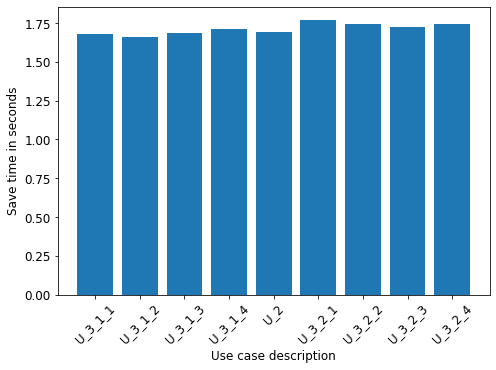

['U_3_1_1', 'U_3_1_2', 'U_3_1_3', 'U_3_1_4', 'U_2', 'U_3_2_1', 'U_3_2_2', 'U_3_2_3', 'U_3_2_4']


In [21]:
plot_save_time_one_model(save_times['mobilenet'], './pdfs/mobilenet.pdf')

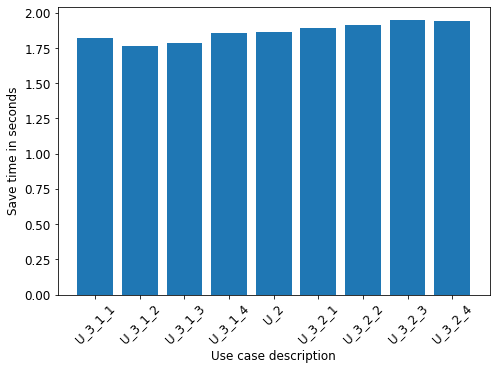

['U_3_1_1', 'U_3_1_2', 'U_3_1_3', 'U_3_1_4', 'U_2', 'U_3_2_1', 'U_3_2_2', 'U_3_2_3', 'U_3_2_4']


In [6]:
plot_save_time_one_model(save_times['googlenet'])

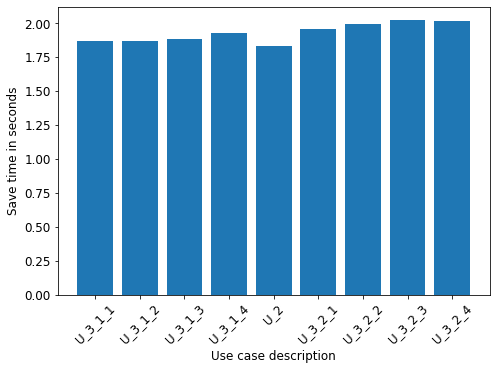

['U_3_1_1', 'U_3_1_2', 'U_3_1_3', 'U_3_1_4', 'U_2', 'U_3_2_1', 'U_3_2_2', 'U_3_2_3', 'U_3_2_4']


In [7]:
plot_save_time_one_model(save_times['resnet18'])

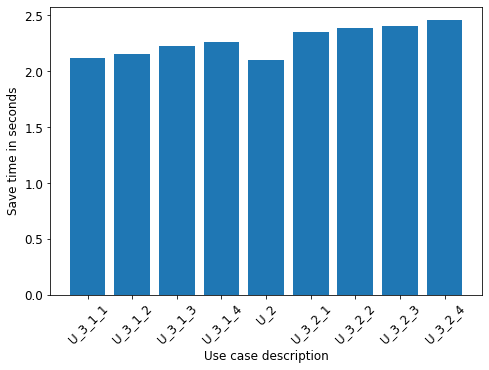

['U_3_1_1', 'U_3_1_2', 'U_3_1_3', 'U_3_1_4', 'U_2', 'U_3_2_1', 'U_3_2_2', 'U_3_2_3', 'U_3_2_4']


In [8]:
plot_save_time_one_model(save_times['resnet50'])

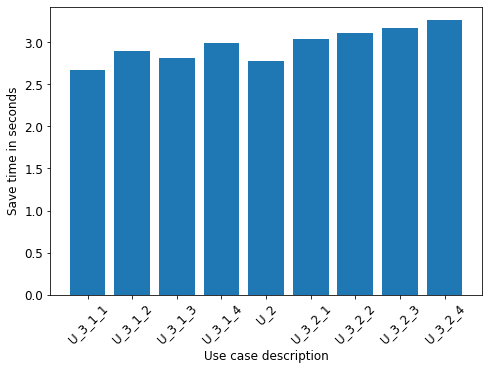

['U_3_1_1', 'U_3_1_2', 'U_3_1_3', 'U_3_1_4', 'U_2', 'U_3_2_1', 'U_3_2_2', 'U_3_2_3', 'U_3_2_4']


In [9]:
plot_save_time_one_model(save_times['resnet152'])

In [10]:
baseline_version_food_node_0

[({'location': 'node',
   'model': 'resnet18',
   'approach': 'baseline',
   'snapshot_type': 'version',
   'snapshot_dist': 'food',
   'run': '0'},
   <experiments.plots.util.Event at 0x13edcd760>]),
 ({'location': 'node',
   'model': 'googlenet',
   'approach': 'baseline',
   'snapshot_type': 'version',
   'snapshot_dist': 'food',
   'run': '0'},
   <experiments.plots.util.Event at 0x141127cd0>]),
 ({'location': 'node',
   'model': 'resnet50',
   'approach': 'baseline',
   'snapshot_type': 'version',
   'snapshot_dist': 'food',
   'run': '0'},
   <experiments.plots.util.Event at 0x142fc8910>]),
 ({'location': 'node',
   'model': 'resnet152',
   'approach': 'baseline',
   'snapshot_type': 'version',
   'snapshot_dist': 'food',
   'run': '0'},
   <experiments.plots.util.Event at 0x14653b490>]),
 ({'location': 'node',
   'model': 'mobilenet',
   'approach': 'baseline',
   'snapshot_type': 'version',
   'snapshot_dist': 'food',
   'run': '0'},
   <experiments.plots.util.Event at 0x14720b

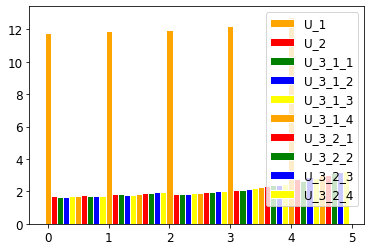

In [11]:


# set width of bars
barWidth = 0.1

bars = {}
for m in MODELS:
    times = save_times[m]
    for use_case, time in times.items():
        if use_case in bars:
            bars[use_case].append(time)
        else:
            bars[use_case] = [time]

# Set position of bar on X axis
# l = len(bars[U_1])
# print(l)
# positions = [np.arange(l)]
# for i in range(1, len(bars)):
#     prev_positions = positions[-1]
#     positions.append(prev_positions)

r1 = np.arange(5)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]
positions = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10]

colors = ['orange', 'red', 'green', 'blue', 'yellow', 'orange', 'red', 'green', 'blue', 'yellow']

for position, bar, color, label in zip(positions, list(bars.values())[:], colors, list(bars.keys())[:]):
    plt.bar(position, bar, color=color, width=barWidth, edgecolor='white', label=label)

# # Add xticks on the middle of the group bars
# plt.xlabel('group', fontweight='bold')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])

# Create legend & Show graphic
plt.legend()
plt.show()

In [12]:
meta, events = baseline_version_food_server_0[0]
e_u1 = events[0]
e_u2 = events[5]
print(e_u1)
print(e_u2)



U_1: 12.7877011550s 
_save_full_model -- all: 10.9241693840s 
	_save_full_model -- pickle_weights: 0.2827220100s 
	_save_full_model -- _get_weights_hash_info: 0.3250028190s 
	_save_full_model -- persist_model_info: 10.3149342840s 
		persist -- schema_obj(model_info): 10.3142882900s 
			persist -- schema_obj(recover_info): 10.2898772890s 
				mmlib_file_pers -- save_file: 0.0297422760s 
				mmlib_file_pers -- save_file: 0.2400102440s 
				persist -- schema_obj(environment): 10.0176539000s 
					mmlib_dict_pers -- save_dict -- collection(environment): 10.0174555220s 
				mmlib_dict_pers -- save_dict -- collection(recover_info): 0.0021956880s 
			mmlib_dict_pers -- save_dict -- collection(model_info): 0.0185543470s 

U_2: 2.7725080120s 
_save_full_model -- all: 0.8421902940s 
	_save_full_model -- pickle_weights: 0.2699474500s 
	_save_full_model -- _get_weights_hash_info: 0.3236611610s 
	_save_full_model -- persist_model_info: 0.2476193000s 
		persist -- schema_obj(model_info): 0.247407566

In [13]:
meta, events = extract_event_and_and_meta('/Users/nils/Downloads/test-env-log.txt')

NameError: name 'extract_event_and_and_meta' is not defined

In [ ]:
for e in events:
    print(e)